# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "*Deep Vision in classification tasks*"


<b><span style="font-size: 22px; color: blue;">INTEGRANTES:</span></b>
<ul>
  <li>Egon Kirchof Mazera</li>
  <li>Richard José Mendoza Medina</li>
  <li>Mayra Alexandra Orellana Lara</li>
  <li>Robinson Jair Ramírez Bustos</li>
</ul>

## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. Los alumnos deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera el uso de todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

## Normas a seguir

- Será **indispensable** realizar el **trabajo por parejas**. Dichas parejas de alumnxs se generarán **de manera automática** teniendo en cuenta el pais de residencia con el objetivo de facilitar el trabajo en equipo.  
- Se debe entregar un **ÚNICO FICHERO PDF POR ALUMNO** que incluya las instrucciones presentes en el Colab Noteboook y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso llevado a cabo en cada estrategia (i.e. carga de datos, inspección de datos, acondicionamiento, proceso de entrenamiento y proceso de validación del modelo).
- **La memoria del trabajo** (el fichero PDF mencionado en el punto anterior) deberá **subirla cada integrante del grupo** (aunque se trate de un documento idéntico) a la actividad que se habilitará **en CampusVIU**.
- Se recomienda trabajar respecto a un directorio base (**BASE_FOLDER**) para facilitar el trabajo en equipo. En este notebook se incluye un ejemplo de cómo almacenar/cargar datos utilizando un directorio base.
- Las **redes propuestas** deben estar **entrenadas** (y **EVIDENCIAR este proceso en el documento PDF**). La entrega de una **red sin entrenar** supondrá **perdida de puntos**.
- Si se desea **evidenciar alguna métrica** del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas.
- Todos los **gráficos** que se deseen mostrar deberán **generarse en el Colab Notebook** para que tras la conversión aparezcan en el documento PDF.

## *Tips* para realizar la actividad con éxito
- Los **datos** se cargarán directamente **desde** la plataforma **Kaggle** mediante su API (https://github.com/Kaggle/kaggle-api). En este Notebook se incluye un ejemplo de como hacerlo. Se recomienda generar una función que aborde esta tarea.
- El **documento PDF a entregar** como solución de la actividad se debe **generar automáticamente desde el fichero ".ipynb"**. En este Notebook se incluye un ejemplo de como hacerlo.
- **Generar secciones y subsecciones en el Colab Notebook** supondrá que el documento **PDF generado** queda totalmente **ordenado** facilitando la evaluación al docente.
- Se recomienda encarecidamente **incluir comentarios concisos pero aclaratorios**.
- Es muy recomendable crear una **última sección** de texto en el Colab Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterios de evaluación

- **Seguimiento** de las **normas establecidas** en la actividad (detalladas anteriormente).
- Creación de una **solución que resuelva la tarea de clasificación**, i.e. que las figuras de mérito empleadas para medir la bondad del modelo predictivo evidencien un *performance* superior al rendimiento estocástico.
- **Claridad** en la creación de la solución, en las justificaciones sobre la toma de decisiones llevada a cabo así como en las comparativas y conclusiones finales.
- **Efectividad** al presentar las comparaciones entre métricas de evaluación de ambas estrategias.
- **Demostración** de la utilización de **técnicas de regularización** para mejorar el rendimiento de los modelos.

<b><span style="font-size: 22px; color: magenta;">1.- CARGA DEL CONJUNTO DE DATOS</span></b>

In [ ]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.5
    Uninstalling kaggle-1.7.4.5:
      Successfully uninstalled kaggle-1.7.4.5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Crear la carpeta .kaggle si no existe
!mkdir -p ~/.kaggle

In [ ]:
# Copiar el archivo desde Drive a la carpeta oculta de Kaggle
# ¡NOTA LAS COMILLAS SIMPLES ALREDEDOR DE LA RUTA DE ORIGEN!
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ~/.kaggle/

In [ ]:
# Dar los permisos de seguridad requeridos (solo lectura para el dueño)
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                             title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
sadiajavedd/students-academic-performance-dataset               Students_Academic_Performance_Dataset                    8907  2025-10-23 04:16:35.563000           7354        183  1.0              
kainatjamil12/housing                                           🏡 Housing Price Dataset — Factors Affecting Home         4740  2025-11-08 11:00:08.757000           1391         27  1.0              
ayeshaimran123/social-media-and-mental-health-balance           Social Media and Mental Health Balance                   5941  2025-10-26 07:51:53.380000           7080         98  1.0              
shahz

In [ ]:
!kaggle datasets download -d gpiosenka/butterflies-100-image-dataset-classification

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/butterflies-100-image-dataset-classification
License(s): unknown
 90% 409M/454M [00:04<00:00, 106MB/s] 
100% 454M/454M [00:04<00:00, 110MB/s]


In [ ]:
# Creemos un directorio para descomprimir los datos
!mkdir my_dataset

mkdir: cannot create directory ‘my_dataset’: File exists


In [ ]:
# Descomprimimos los datos y los dejamos listos para trabajar
!unzip butterflies-100-image-dataset-classification.zip -d my_dataset

In [ ]:
# Mostrar el contenido inmediato de la carpeta principal
!ls my_dataset

# Mostrar el contenido de la carpeta 'train' (donde están las clases)
!ls my_dataset/train | head -n 10

BUTTERFLIES-97.77.h5  BUTTERFLIES.csv  test  train  valid
ADONIS
AFRICAN GIANT SWALLOWTAIL
AMERICAN SNOOT
AN 88
APPOLLO
ARCIGERA FLOWER MOTH
ATALA
ATLAS MOTH
BANDED ORANGE HELICONIAN
BANDED PEACOCK


In [1]:
import kagglehub

# Download latest version
my_dataset = kagglehub.dataset_download("gpiosenka/butterflies-100-image-dataset-classification")

print("Path to dataset files:", my_dataset)

Using Colab cache for faster access to the 'butterflies-100-image-dataset-classification' dataset.
Path to dataset files: /kaggle/input/butterflies-100-image-dataset-classification


<b><span style="font-size: 22px; color: magenta;">2.- INSPECCIÓN DEL CONJUNTO DE DATOS</span></b>

Total de imágenes encontradas: 12639
Total de clases (especies): 100

--- Distribución de las 5 clases MÁS COMUNES ---
class_name
MOURNING CLOAK      187
GREEN HAIRSTREAK    176
BROWN ARGUS         169
BROOKES BIRDWING    165
SLEEPY ORANGE       153
Name: count, dtype: int64

--- Distribución de las 5 clases MENOS COMUNES ---
class_name
GOLD BANDED            104
CRIMSON PATCH          103
MALACHITE              103
WOOD SATYR             102
SIXSPOT BURNET MOTH    101
Name: count, dtype: int64


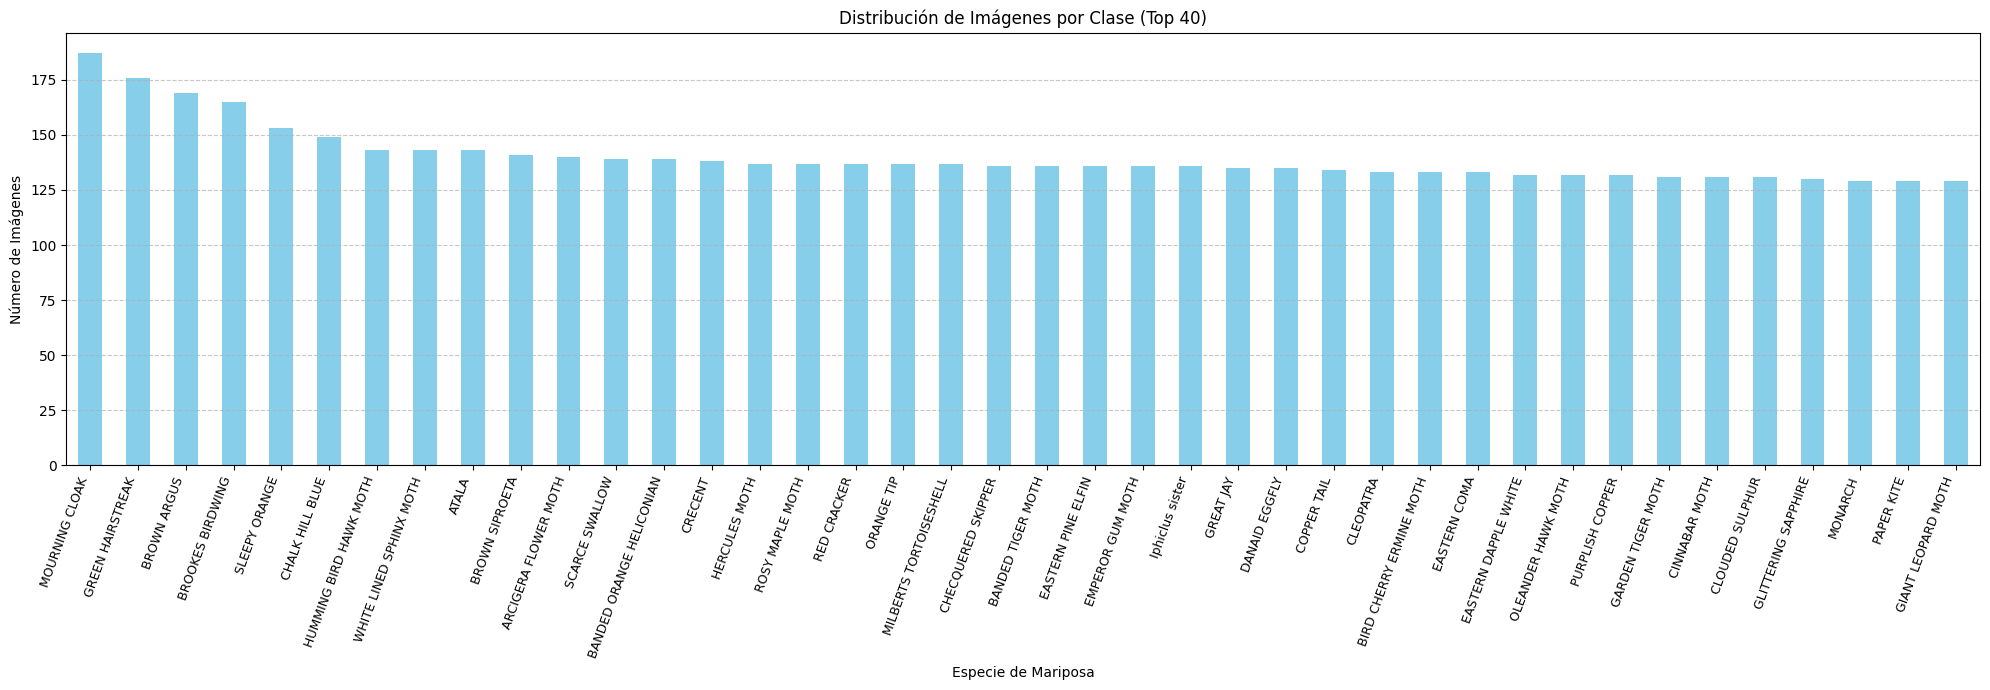

In [2]:
#Inspección del conjunto de datos
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# --- A. Carga e Inspección ---
# La ruta base donde están las carpetas de las clases
DATA_DIR = os.path.join(my_dataset, 'train')

# Recolectar todas las rutas de archivos .jpg de forma recursiva
all_image_paths = glob.glob(os.path.join(DATA_DIR, '**/*.jpg'), recursive=True)

# Crear un DataFrame para manejar las rutas y clases
df = pd.DataFrame({'path': all_image_paths})

# Extraer el nombre de la clase (que es el nombre de la carpeta)
df['class_name'] = df['path'].apply(lambda x: os.path.basename(os.path.dirname(x)))

# Contar la frecuencia de imágenes por clase
class_counts = df['class_name'].value_counts()

# --- B. Resultados en Consola ---
print(f"Total de imágenes encontradas: {len(df)}")
print(f"Total de clases (especies): {class_counts.shape[0]}\n")
print("--- Distribución de las 5 clases MÁS COMUNES ---")
print(class_counts.head())
print("\n--- Distribución de las 5 clases MENOS COMUNES ---")
print(class_counts.tail())


# --- C. Visualización de la Distribución (Justificación de Regularización) ---
# Usar un gráfico de barras para visualizar el desequilibrio
plt.figure(figsize=(20, 7))
# Mostramos un subconjunto de clases (ej. las 40 principales) para mayor claridad visual
class_counts.head(40).plot(kind='bar', color='skyblue')
plt.title('Distribución de Imágenes por Clase (Top 40)')
plt.xlabel('Especie de Mariposa')
plt.ylabel('Número de Imágenes')
plt.xticks(rotation=70, ha='right', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#

Mostrando 6 imágenes de la clase seleccionada al azar: METALMARK



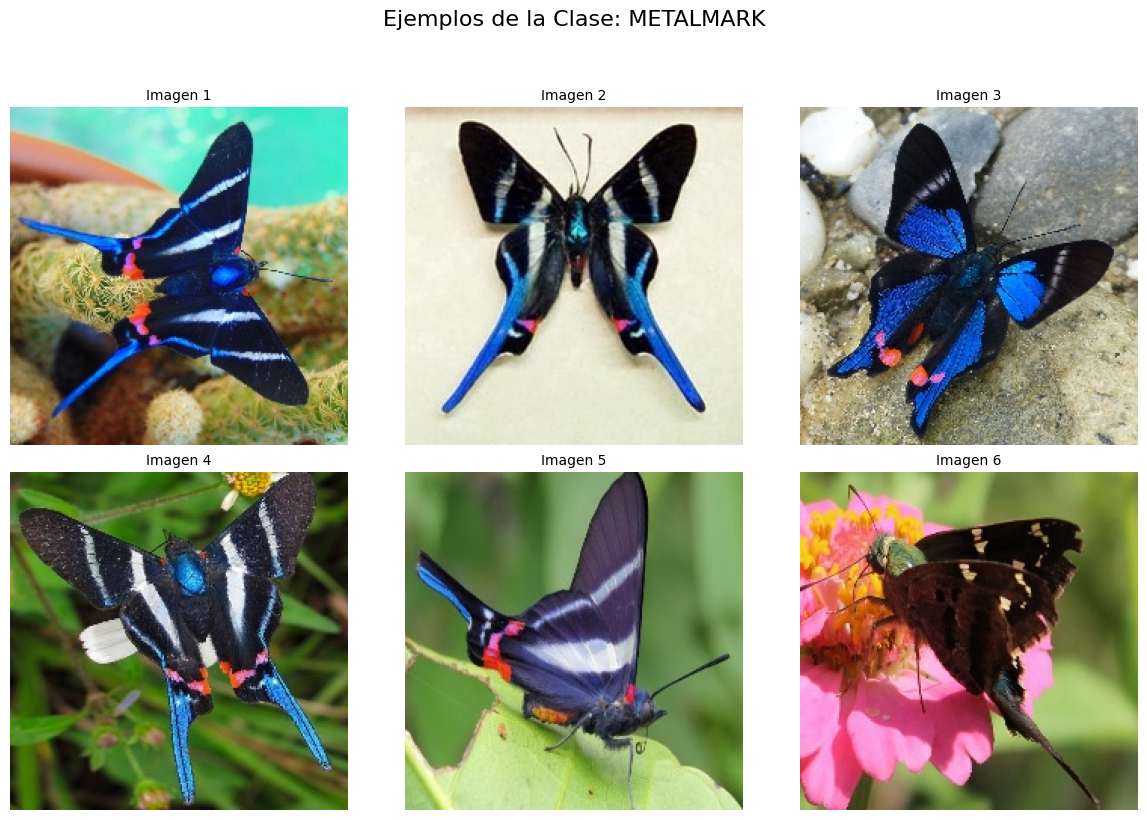

In [3]:
import os
import glob
import random
from PIL import Image
import matplotlib.pyplot as plt

# La ruta base donde están las carpetas de las clases
DATA_DIR = os.path.join(my_dataset, 'train')

# 1. Obtener todas las carpetas de clases
class_folders = glob.glob(os.path.join(DATA_DIR, '*'))

# 2. Seleccionar una clase (carpeta) al azar
random_class_folder = random.choice(class_folders)
class_name = os.path.basename(random_class_folder)

# 3. Obtener todas las rutas de imágenes dentro de la clase seleccionada
image_paths = glob.glob(os.path.join(random_class_folder, '*.jpg'))

# 4. Seleccionar 6 imágenes al azar (o menos, si la clase tiene menos de 6)
num_samples = 6
sample_images = random.sample(image_paths, min(num_samples, len(image_paths)))

# 5. Mostrar las imágenes
print(f"Mostrando {len(sample_images)} imágenes de la clase seleccionada al azar: {class_name}\n")

plt.figure(figsize=(12, 8))
plt.suptitle(f'Ejemplos de la Clase: {class_name}', fontsize=16, y=1.02)

for i, path in enumerate(sample_images):
    # Cargar la imagen
    img = Image.open(path)

    # Crear un subplot de 2 filas y 3 columnas (2x3)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Imagen {i + 1}", fontsize=10)
    plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajustar diseño para incluir el título principal
plt.show()
#

In [4]:
import os
import glob
import pandas as pd

# La ruta base donde se encuentran las 100 carpetas de clases
DATA_DIR = os.path.join(my_dataset, 'train')

# 1. Recolectar todas las rutas de imágenes
# La búsqueda recursiva encuentra todos los .jpg dentro de las subcarpetas de DATA_DIR
all_image_paths = glob.glob(os.path.join(DATA_DIR, '**/*.jpg'), recursive=True)

# 2. Crear un DataFrame para procesar
df = pd.DataFrame({'path': all_image_paths})

# 3. Extraer el nombre de la clase (nombre de la carpeta)
# os.path.dirname(x) te da la ruta de la carpeta, os.path.basename() extrae el nombre de la clase
df['class_name'] = df['path'].apply(lambda x: os.path.basename(os.path.dirname(x)))

# 4. Contar la frecuencia de imágenes por cada clase (especie)
class_counts = df['class_name'].value_counts().sort_index()

# 5. Mostrar los resultados
print(f"Total de imágenes encontradas en DATA_DIR: {len(df)}")
print(f"Total de clases (especies): {class_counts.shape[0]}\n")

print("--- CONTEO DE IMÁGENES POR CLASE (Top 10 y Últimas 10) ---")
print("Top 10:")
print(class_counts.head(10))
print("\nÚltimas 10:")
print(class_counts.tail(10))

# Muestra la distribución completa si quieres ver las 100 clases (es opcional debido a la longitud)
# print("\nDistribución completa de las 100 clases:\n", class_counts)

Total de imágenes encontradas en DATA_DIR: 12639
Total de clases (especies): 100

--- CONTEO DE IMÁGENES POR CLASE (Top 10 y Últimas 10) ---
Top 10:
class_name
ADONIS                       126
AFRICAN GIANT SWALLOWTAIL    107
AMERICAN SNOOT               105
AN 88                        121
APPOLLO                      128
ARCIGERA FLOWER MOTH         140
ATALA                        143
ATLAS MOTH                   129
BANDED ORANGE HELICONIAN     139
BANDED PEACOCK               119
Name: count, dtype: int64

Últimas 10:
class_name
SOUTHERN DOGFACE           125
STRAITED QUEEN             124
TROPICAL LEAFWING          118
TWO BARRED FLASHER         109
ULYSES                     120
VICEROY                    115
WHITE LINED SPHINX MOTH    143
WOOD SATYR                 102
YELLOW SWALLOW TAIL        107
ZEBRA LONG WING            108
Name: count, dtype: int64


<b><span style="font-size: 22px; color: magenta;">3.- ACONDICIONAMIENTO DEL CONJUNTO DE DATOS</span></b>

In [5]:
# Acondicionamiento del Conjunto de Datos (Paso 3)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import glob
import numpy as np

# --- 1. Definición de Parámetros Globales ---
# Estos parámetros deben ser justificados en tu informe:
IMG_SIZE = 128  # Reducción de tamaño para acelerar el entrenamiento (ej. 128x128)
BATCH_SIZE = 32 # Tamaño estándar para el procesamiento en lote
DATA_DIR = os.path.join(my_dataset, 'train')

# Contar el número total de imágenes para calcular pasos por época

total_images = len(glob.glob(os.path.join(DATA_DIR, '**/*.jpg'), recursive=True))

# --- 2. Configuración del Aumento de Datos (Regularización) ---
# Justificación: Estas técnicas aumentan la robustez del modelo
# y combaten el sobreajuste (overfitting) debido a la gran cantidad de clases (100).
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalización de píxeles (de 0-255 a 0-1) - CRÍTICO
    validation_split=0.2,     # Reservar 20% de los datos para el conjunto de validación

    # Técnicas de Data Augmentation:
    rotation_range=30,        # Rotación hasta 30 grados
    width_shift_range=0.2,    # Desplazamiento horizontal (20% del ancho)
    height_shift_range=0.2,   # Desplazamiento vertical (20% del alto)
    shear_range=0.2,          # Corte o cizallamiento
    zoom_range=0.2,           # Zoom aleatorio
    brightness_range=[0.5, 1.5], # Nuevo: Variación de brillo
    channel_shift_range=30,      # Nuevo: Variación de color
    horizontal_flip=True,     # Volteo horizontal (útil para mariposas)
    vertical_flip=True,        # Volteo vertical (útil para mariposas)
    fill_mode='nearest'       # Estrategia para rellenar píxeles nuevos
)

# --- 3. Creación de Generadores ---

# Generador de Entrenamiento
train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training', # Utiliza la porción de entrenamiento
    shuffle=True # Mezclar los datos para evitar sesgos
)

# Generador de Validación
validation_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation', # Utiliza la porción de validación
    shuffle=False # No es necesario mezclar para validación
)

# --- 4. Verificación de Dimensiones y Conteo Final ---
NUM_CLASSES = train_generator.num_classes
STEPS_PER_EPOCH = train_generator.samples // BATCH_SIZE
VALIDATION_STEPS = validation_generator.samples // BATCH_SIZE

print("\n--- Resumen del Acondicionamiento ---")
print(f"Número de Clases (Salida de la Red): {NUM_CLASSES}")
print(f"Imágenes de Entrenamiento: {train_generator.samples}")
print(f"Imágenes de Validación: {validation_generator.samples}")
print(f"Dimensiones de Entrada de la Red: ({IMG_SIZE}, {IMG_SIZE}, 3)")
print(f"Pasos por Época (Train): {STEPS_PER_EPOCH}")
print(f"Pasos por Época (Validation): {VALIDATION_STEPS}")

Found 10151 images belonging to 100 classes.
Found 2488 images belonging to 100 classes.

--- Resumen del Acondicionamiento ---
Número de Clases (Salida de la Red): 100
Imágenes de Entrenamiento: 10151
Imágenes de Validación: 2488
Dimensiones de Entrada de la Red: (128, 128, 3)
Pasos por Época (Train): 317
Pasos por Época (Validation): 77


In [6]:
# Muestra el diccionario de clases: {'BLUE MORPHO': 0, 'GREEN HAIRSTREAK': 1, ...}
print(train_generator.class_indices)

{'ADONIS': 0, 'AFRICAN GIANT SWALLOWTAIL': 1, 'AMERICAN SNOOT': 2, 'AN 88': 3, 'APPOLLO': 4, 'ARCIGERA FLOWER MOTH': 5, 'ATALA': 6, 'ATLAS MOTH': 7, 'BANDED ORANGE HELICONIAN': 8, 'BANDED PEACOCK': 9, 'BANDED TIGER MOTH': 10, 'BECKERS WHITE': 11, 'BIRD CHERRY ERMINE MOTH': 12, 'BLACK HAIRSTREAK': 13, 'BLUE MORPHO': 14, 'BLUE SPOTTED CROW': 15, 'BROOKES BIRDWING': 16, 'BROWN ARGUS': 17, 'BROWN SIPROETA': 18, 'CABBAGE WHITE': 19, 'CAIRNS BIRDWING': 20, 'CHALK HILL BLUE': 21, 'CHECQUERED SKIPPER': 22, 'CHESTNUT': 23, 'CINNABAR MOTH': 24, 'CLEARWING MOTH': 25, 'CLEOPATRA': 26, 'CLODIUS PARNASSIAN': 27, 'CLOUDED SULPHUR': 28, 'COMET MOTH': 29, 'COMMON BANDED AWL': 30, 'COMMON WOOD-NYMPH': 31, 'COPPER TAIL': 32, 'CRECENT': 33, 'CRIMSON PATCH': 34, 'DANAID EGGFLY': 35, 'EASTERN COMA': 36, 'EASTERN DAPPLE WHITE': 37, 'EASTERN PINE ELFIN': 38, 'ELBOWED PIERROT': 39, 'EMPEROR GUM MOTH': 40, 'GARDEN TIGER MOTH': 41, 'GIANT LEOPARD MOTH': 42, 'GLITTERING SAPPHIRE': 43, 'GOLD BANDED': 44, 'GREAT EG

<b><span style="font-size: 26px; color: blue;">ESTRATEGIA 1: Entrenar desde cero o from scratch</span></b>

<b><span style="font-size: 22px; color: magenta;">1. MODELO 1</span></b>

<b><span style="font-size: 18px; color: magenta;">1.1.- DESARROLLO DE LA ARQUITECTURA DE RED NEURONAL Y ENTRENAMIENTO DE LA SOLUCIÓN</span></b>

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np

# --- 1. Definición y Compilación del Modelo CNN v1 ---
print("Definiendo la arquitectura CNN v1...")

model_v1 = Sequential([
    # Bloque 1
    Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),

    # Bloque 2
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.0005)),
    MaxPooling2D((2, 2)),

    # Bloque 3 (Añadido para mayor profundidad)
    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.0005)),
    MaxPooling2D((2, 2)),
    # Aplanamiento y Capas Densely Connected
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    # Capa de Salida
    Dense(NUM_CLASSES, activation='softmax')
])

# Compilación
model_v1.compile(
    optimizer=Adam(learning_rate=0.0005), # LR más baja para convergencia fina
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_v1.summary()

# --- 2. Entrenamiento con Callbacks Avanzados ---

# Recalcular pasos por época (asegurando que no se corte el entrenamiento)
STEPS_PER_EPOCH = int(np.ceil(train_generator.samples / BATCH_SIZE))
VALIDATION_STEPS = int(np.ceil(validation_generator.samples / BATCH_SIZE))
EPOCHS = 100 # Aumentamos las épocas, EarlyStopping actuará como límite

# Definición de Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

checkpoint_path = 'best_cnn_from_scratch_v2.keras'
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Estrategia de Decaimiento de Tasa de Aprendizaje
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,         # Reduce la LR a 1/5
    patience=5,         # Espera 5 épocas sin mejora
    min_lr=0.00001,
    verbose=1
)

print(f"\nIniciando Entrenamiento para {EPOCHS} épocas...")
print(f"Pasos por Época (Train): {STEPS_PER_EPOCH}, Pasos (Validation): {VALIDATION_STEPS}")



Definiendo la arquitectura CNN v2...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,242,852 (50.52 MB)

 Trainable params: 13,242,340 (50.52 MB)

 Non-trainable params: 512 (2.00 KB)


Iniciando Entrenamiento para 100 épocas...
Pasos por Época (Train): 318, Pasos (Validation): 78


In [8]:
history_v1 = model_v1.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS,
    callbacks=[early_stopping, model_checkpoint, reduce_lr], # Se usan los 3 callbacks
    verbose=1
)

print("\n--- Entrenamiento Finalizado ---")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.0635 - loss: 4.3563
Epoch 1: val_accuracy improved from -inf to 0.18449, saving model to best_cnn_from_scratch_v2.keras
318/318 ━━━━━━━━━━━━━━━━━━━━ 136s 404ms/step - accuracy: 0.0637 - loss: 4.3551 - val_accuracy: 0.1845 - val_loss: 3.5247 - learning_rate: 5.0000e-04
Epoch 2/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.2355 - loss: 3.2011
Epoch 2: val_accuracy improved from 0.18449 to 0.25764, saving model to best_cnn_from_scratch_v2.keras
318/318 ━━━━━━━━━━━━━━━━━━━━ 80s 252ms/step - accuracy: 0.2356 - loss: 3.2005 - val_accuracy: 0.2576 - val_loss: 2.9711 - learning_rate: 5.0000e-04
Epoch 3/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.3805 - loss: 2.5544
Epoch 3: val_accuracy improved from 0.25764 to 0.42886, saving model to best_cnn_from_scratch_v2.keras
318/318 ━━━━━━━━━━━━━━━━━━━━ 79s 249ms/step - accuracy: 0.3806 - loss: 2.5541 - val_accuracy: 0.4289 - val_loss: 2.3668 - learning

<b><span style="font-size: 18px; color: magenta;">1.2.- MONITORIZACIÓN DEL PROCESO DE ENTRENAMIENTO PARA LA TOMA DE DECISIONES</span></b>

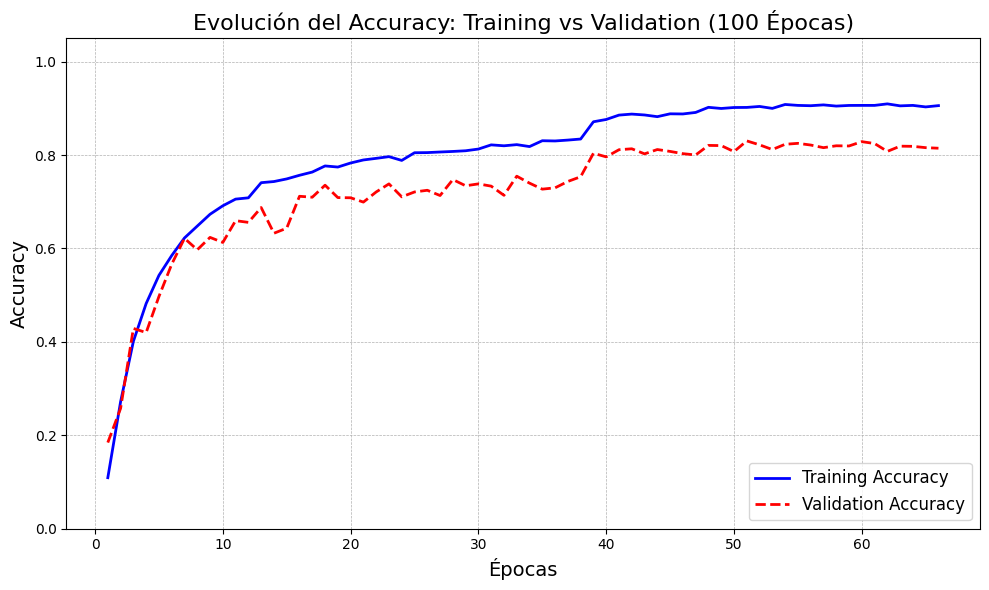

In [11]:
import matplotlib.pyplot as plt
---------------------------------------------------------

# Lista de Accuracy de Entrenamiento (100 datos)
train_acc =history_v1.history["accuracy"]

# Lista de Accuracy de Validación (100 datos)
val_acc = history_v1.history["val_accuracy"]

# Generamos la lista de épocas (del 1 al 100)
epochs = range(1, len(train_acc)+1)

# ---------------------------------------------------------
# 2. GENERACIÓN DEL GRÁFICO
# ---------------------------------------------------------

plt.figure(figsize=(10, 6)) # Tamaño del gráfico

# Dibujar las líneas
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy', linewidth=2)
plt.plot(epochs, val_acc, 'r--', label='Validation Accuracy', linewidth=2)

# Títulos y Etiquetas
plt.title('Evolución del Accuracy: Training vs Validation (100 Épocas)', fontsize=16)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Añadir leyenda y rejilla
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ajustar límites (Opcional: asumiendo accuracy de 0 a 1)
plt.ylim(0, 1.05)

# Mostrar gráfico
plt.tight_layout()
plt.show()

<b><span style="color: magenta;">Interpretación:</span></b> La curva de entrenamiento (azul, Training Accuracy) está consistentemente por encima de la curva de validación (roja, Validation Accuracy), el diagnóstico es claro: Sobreajuste (Overfitting). <br>

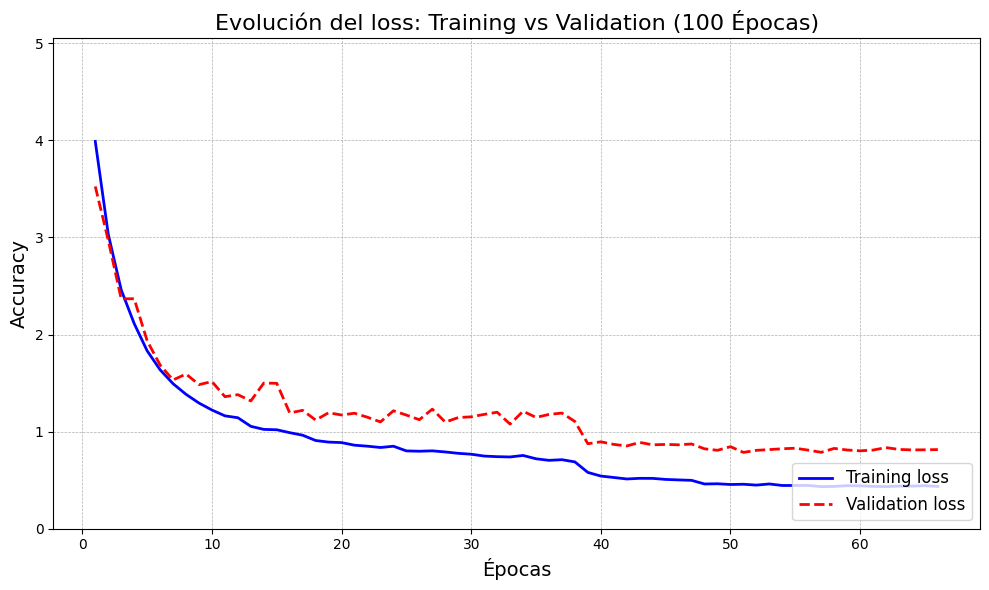

In [13]:
train_acc =history_v1.history["loss"]
val_acc = history_v1.history["val_loss"]

# Generamos la lista de épocas (del 1 al 100)
epochs = range(1, len(train_acc)+1)

# ---------------------------------------------------------
# 2. GENERACIÓN DEL GRÁFICO
# ---------------------------------------------------------

plt.figure(figsize=(10, 6)) # Tamaño del gráfico

# Dibujar las líneas
plt.plot(epochs, train_acc, 'b-', label='Training loss', linewidth=2)
plt.plot(epochs, val_acc, 'r--', label='Validation loss', linewidth=2)

# Títulos y Etiquetas
plt.title('Evolución del loss: Training vs Validation (100 Épocas)', fontsize=16)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Añadir leyenda y rejilla
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ajustar límites (Opcional: asumiendo accuracy de 0 a 1)
plt.ylim(0, 5.05)

# Mostrar gráfico
plt.tight_layout()
plt.show()

<b><span style="color: magenta;">Interpretación:</span></b> El gráfico de pérdidas da la misma conclusión que el gráfico de precisión por lo que se concluye que se requiere más regularización.<br>

<b><span style="font-size: 18px; color: magenta;">1.3.- EVALUACIÓN DEL MODELO PREDICTIVO Y PLANTEAMIENTO DE LA SIGUIENTE PRUEBA EXPERIMENTAL</span></b>

Este modelo representa una buena línea de base (baseline) para la clasificación multiclase, combinando una arquitectura funcional con estrategias de entrenamiento diseñadas para optimizar la generalización y evitar la inestabilidad.<br>
La evaluación del resultado del Modelo v1 muestra un claro caso de sobreajuste (overfitting) y una convergencia estancada, a pesar de las estrategias de entrenamiento avanzadas.<br>
El análisis a continuación se centra en la brecha entre las métricas de entrenamiento y validación al final del proceso:<br>
<table border="1" style="width:100%; border-collapse: collapse; text-align: left;">
    <thead>
        <tr style="background-color: #f2f2f2;">
            <th style="padding: 10px;">Métrica</th>
            <th style="padding: 10px;">Entrenamiento (Train)</th>
            <th style="padding: 10px;">Validación (Validation)</th>
            <th style="padding: 10px;">Diferencia</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="padding: 10px;"><strong>Precisión (Accuracy)</strong></td>
            <td style="padding: 10px;">$\sim 90.6\%$</td>
            <td style="padding: 10px;">$\sim 81.6\%$</td>
            <td style="padding: 10px;">$\sim 9.0\%$ (Brecha grande)</td>
        </tr>
        <tr>
            <td style="padding: 10px;"><strong>Pérdida (Loss)</strong></td>
            <td style="padding: 10px;">$\sim 0.44$</td>
            <td style="padding: 10px;">$\sim 0.81$</td>
            <td style="padding: 10px;">$\sim 0.37$ (Brecha significativa)</td>
        </tr>
        <tr>
            <td style="padding: 10px;"><strong>Tasa de Aprendizaje (LR)</strong></td>
            <td style="padding: 10px;">$1.0000\mathrm{e}^{-05}$</td>
            <td style="padding: 10px;">$1.0000\mathrm{e}^{-05}$</td>
            <td style="padding: 10px;">La LR ya está en su valor mínimo.</td>
        </tr>
    </tbody>
</table>

<b><span style="font-size: 22px; color: magenta;">2. MODELO 2</span></b>

<b><span style="font-size: 18px; color: magenta;">2.1.- DESARROLLO DE LA ARQUITECTURA DE RED NEURONAL Y ENTRENAMIENTO DE LA SOLUCIÓN</span></b>

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np

# --- 1. Definición y Compilación del Modelo CNN v2 ---
# Este modelo incrementa la capacidad (más filtros, más neuronas densas)
# y la regularización (Dropout, L2, Batch Normalization) para mejorar el rendimiento.
# y la regularización (Dropout, L2, Batch Normalization) para mejorar el rendimiento.
print("Definiendo la arquitectura CNN v2...")

model_v2 = Sequential([
    # Bloque 1
    Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Bloque 2
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Bloque 3 (Añadido para mayor profundidad)
    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Aplanamiento y Capas Densely Connected
    Flatten(),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.6), # Mayor Dropout para compensar las 1024 neuronas

    # Capa de Salida
    Dense(NUM_CLASSES, activation='softmax')
])

# Compilación
model_v2.compile(
    optimizer=Adam(learning_rate=0.0005), # LR más baja para convergencia fina
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_v2.summary()

# --- 2. Entrenamiento con Callbacks Avanzados ---

# Recalcular pasos por época (asegurando que no se corte el entrenamiento)
STEPS_PER_EPOCH = int(np.ceil(train_generator.samples / BATCH_SIZE))
VALIDATION_STEPS = int(np.ceil(validation_generator.samples / BATCH_SIZE))
EPOCHS = 100 # Aumentamos las épocas, EarlyStopping actuará como límite

# Definición de Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

checkpoint_path = 'best_cnn_from_scratch_v2.keras'
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Estrategia de Decaimiento de Tasa de Aprendizaje
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,         # Reduce la LR a 1/5
    patience=5,         # Espera 5 épocas sin mejora
    min_lr=0.00001,
    verbose=1
)

print(f"\nIniciando Entrenamiento para {EPOCHS} épocas...")
print(f"Pasos por Época (Train): {STEPS_PER_EPOCH}, Pasos (Validation): {VALIDATION_STEPS}")



Definiendo la arquitectura CNN v2...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    51,381,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │       102,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,860,452 (197.83 MB)

 Trainable params: 51,857,508 (197.82 MB)

 Non-trainable params: 2,944 (11.50 KB)


Iniciando Entrenamiento para 100 épocas...
Pasos por Época (Train): 318, Pasos (Validation): 78


In [16]:
history_v2 = model_v2.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS,
    callbacks=[early_stopping, model_checkpoint, reduce_lr], # Se usan los 3 callbacks
    verbose=1
)

print("\n--- Entrenamiento Finalizado ---")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.0550 - loss: 5.5376
Epoch 1: val_accuracy improved from -inf to 0.02532, saving model to best_cnn_from_scratch_v2.keras
318/318 ━━━━━━━━━━━━━━━━━━━━ 160s 465ms/step - accuracy: 0.0551 - loss: 5.5360 - val_accuracy: 0.0253 - val_loss: 7.7071 - learning_rate: 5.0000e-04
Epoch 2/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.1526 - loss: 4.0965
Epoch 2: val_accuracy improved from 0.02532 to 0.21785, saving model to best_cnn_from_scratch_v2.keras
318/318 ━━━━━━━━━━━━━━━━━━━━ 91s 285ms/step - accuracy: 0.1527 - loss: 4.0961 - val_accuracy: 0.2178 - val_loss: 3.4367 - learning_rate: 5.0000e-04
Epoch 3/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.2279 - loss: 3.4755
Epoch 3: val_accuracy improved from 0.21785 to 0.29180, saving model to best_cnn_from_scratch_v2.keras
318/318 ━━━━━━━━━━━━━━━━━━━━ 90s 283ms/step - accuracy: 0.2279 - loss: 3.4751 - val_accuracy: 0.2918 - val_loss: 3.0124 - learning

<b><span style="font-size: 18px; color: magenta;">2.2.- MONITORIZACIÓN DEL PROCESO DE ENTRENAMIENTO PARA LA TOMA DE DECISIONES</span></b>

In [28]:
import json

# Define the filename
history_filename = 'history_v2.json'

# Save the history object to a JSON file
with open(history_filename, 'w') as f:
    json.dump(history_v2.history, f)

print(f"Training history saved to {history_filename}")

Training history saved to history_v2.json


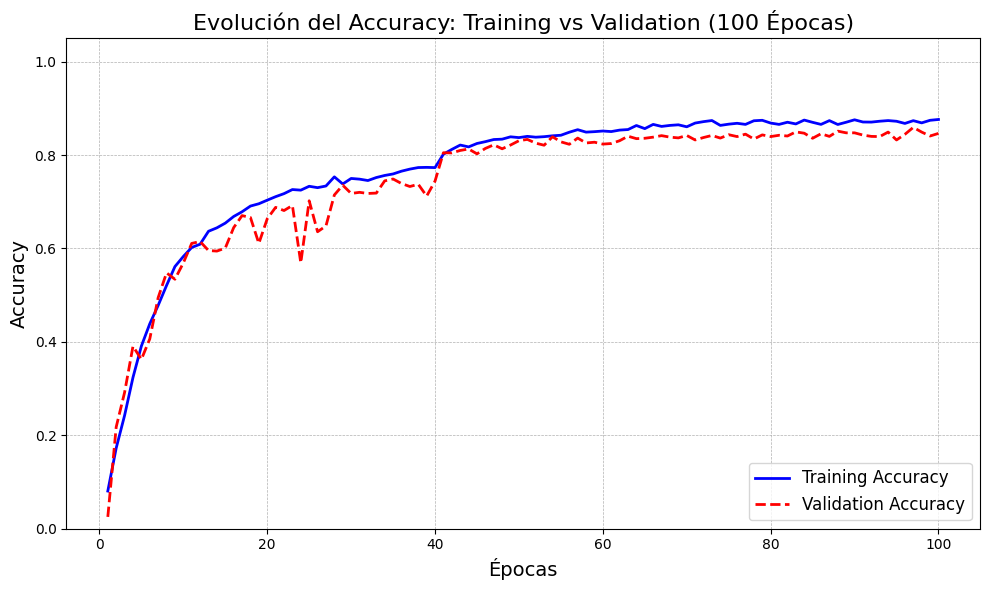

In [23]:
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1. INSERTA TUS DATOS AQUÍ
# Copia y pega tus listas de números dentro de los corchetes
# ---------------------------------------------------------

# Lista de Accuracy de Entrenamiento (100 datos)
train_acc =history_v2.history["accuracy"]

# Lista de Accuracy de Validación (100 datos)
val_acc = history_v2.history["val_accuracy"]

# Generamos la lista de épocas (del 1 al 100)
epochs = range(1, 101)

# ---------------------------------------------------------
# 2. GENERACIÓN DEL GRÁFICO
# ---------------------------------------------------------

plt.figure(figsize=(10, 6)) # Tamaño del gráfico

# Dibujar las líneas
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy', linewidth=2)
plt.plot(epochs, val_acc, 'r--', label='Validation Accuracy', linewidth=2)

# Títulos y Etiquetas
plt.title('Evolución del Accuracy: Training vs Validation (100 Épocas)', fontsize=16)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Añadir leyenda y rejilla
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ajustar límites (Opcional: asumiendo accuracy de 0 a 1)
plt.ylim(0, 1.05)

# Mostrar gráfico
plt.tight_layout()
plt.show()

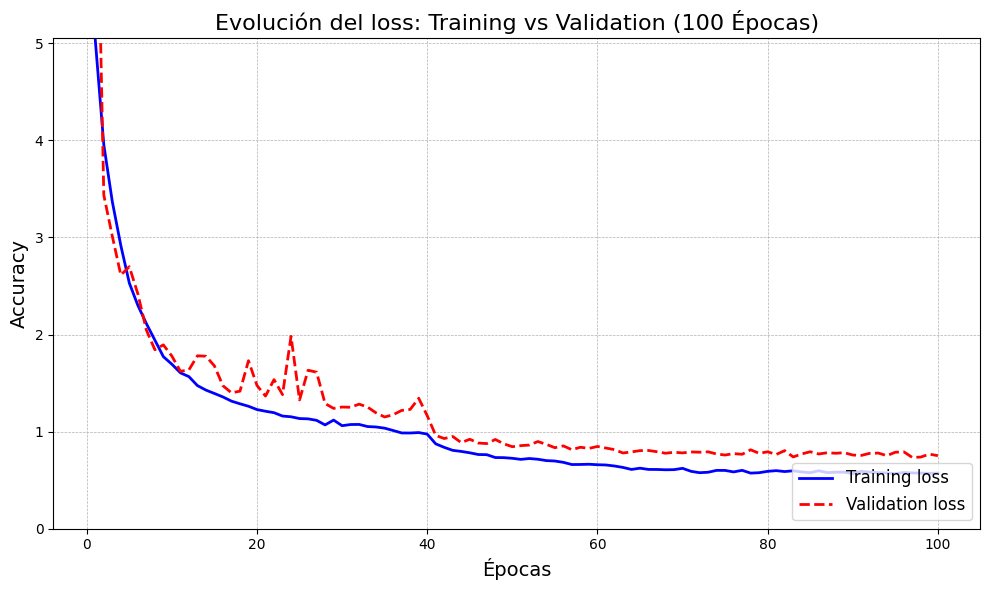

In [25]:

train_acc =history_v2.history["loss"]
val_acc = history_v2.history["val_loss"]

# Generamos la lista de épocas (del 1 al 100)
epochs = range(1, 101)

# ---------------------------------------------------------
# 2. GENERACIÓN DEL GRÁFICO
# ---------------------------------------------------------

plt.figure(figsize=(10, 6)) # Tamaño del gráfico

# Dibujar las líneas
plt.plot(epochs, train_acc, 'b-', label='Training loss', linewidth=2)
plt.plot(epochs, val_acc, 'r--', label='Validation loss', linewidth=2)

# Títulos y Etiquetas
plt.title('Evolución del loss: Training vs Validation (100 Épocas)', fontsize=16)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Añadir leyenda y rejilla
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ajustar límites (Opcional: asumiendo accuracy de 0 a 1)
plt.ylim(0, 5.05)

# Mostrar gráfico
plt.tight_layout()
plt.show()

<b><span style="font-size: 18px; color: magenta;">2.3.- EVALUACIÓN DEL MODELO PREDICTIVO Y PLANTEAMIENTO DE LA SIGUIENTE PRUEBA EXPERIMENTAL</span></b>

El Modelo v2 al final del entrenamiento muestra un rendimiento significativamente mejor que el Modelo v1, ya que logró una mayor precisión de validación, aunque todavía presenta sobreajuste.<br>
El Modelo v2 logró un excelente trabajo al controlar el sobreajuste y llevar la precisión a casi el $86\%$. Sin embargo, la red está estancada en esta arquitectura porque, a pesar de seguir entrenando por más épocas y usar la tasa de aprendizaje más baja, las métricas de validación (val_accuracy y val_loss) dejaron de mejorar consistentemente.<br>


<b>Tabla comparativa del modelo V2 con respecto al V1:</b><br>

<table border="1" style="width:100%; border-collapse: collapse; text-align: left;">
    <thead>
        <tr style="background-color: #f2f2f2;">
            <th style="padding: 10px;">Característica</th>
            <th style="padding: 10px;">Modelo v1</th>
            <th style="padding: 10px;">Modelo v2</th>
            <th style="padding: 10px;">Beneficio de v2</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="padding: 10px;"><strong>Batch Normalization (BN) en Bloques Conv</strong></td>
            <td style="padding: 10px;">Solo al final del Flatten</td>
            <td style="padding: 10px;">Añadido después de cada capa Conv2D.</td>
            <td style="padding: 10px;">Estabilidad y Convergencia: Acelera el entrenamiento y estabiliza el flujo de gradientes en la red profunda.</td>
        </tr>
        <tr>
            <td style="padding: 10px;"><strong>Capacidad de Capa Densa</strong></td>
            <td style="padding: 10px;">256 neuronas</td>
            <td style="padding: 10px;"><strong>1024 neuronas.</strong></td>
            <td style="padding: 10px;">Mayor Capacidad de Aprendizaje: Permite a la red consolidar las 256 características convolucionales en representaciones mucho más complejas antes de la clasificación final de 100 clases.</td>
        </tr>
        <tr>
            <td style="padding: 10px;"><strong>Dropout</strong></td>
            <td style="padding: 10px;">Ninguno en el cuerpo de la CNN.</td>
            <td style="padding: 10px;">Añadido Dropout(0.4) después del Bloque 3 y Dropout(0.6) después de la Capa Densa (1024).</td>
            <td style="padding: 10px;">Mejor Regularización: Combate el sobreajuste de manera más agresiva, esencial tras incrementar la capacidad (1024 neuronas). El alto dropout (0.6) evita que la capa densa memorice los datos.</td>
        </tr>
    </tbody>
</table>

<b><span style="font-size: 22px; color: magenta;">3. MODELO 3</span></b>


<b><span style="font-size: 18px; color: magenta;">3.1.- DESARROLLO DE LA ARQUITECTURA DE RED NEURONAL Y ENTRENAMIENTO DE LA SOLUCIÓN</span></b>

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Aumentar filtros, reducir regularización y hacer la red más profunda

print("Definiendo la arquitectura CNN v3 (Desde Cero, Mejorada)...")

model_v3 = Sequential([
    # Bloque 1: Mayor número de filtros
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.0001), input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Bloque 2
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Bloque 3: Mayor profundidad
    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Bloque 4: Máxima capacidad de extracción de características
    Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling2D((2, 2)), # Esto reduce el tensor a un tamaño manejable

    # Aplanamiento y Capas Densely Connected
    Flatten(),
    # Capa Densa más grande
    Dense(1024, activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Dropout(0.5), # Reducir el Dropout del 0.7 al 0.5

    # Capa de Salida
    Dense(NUM_CLASSES, activation='softmax')
])

# Compilación
model_v3.compile(
    # RMSprop a menudo funciona mejor con redes más profundas que Adam
    optimizer=RMSprop(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_v3.summary()

# --- 2. Entrenamiento con Callbacks Avanzados ---

# Recalcular pasos por época (asegurando que no se corte el entrenamiento)
STEPS_PER_EPOCH = int(np.ceil(train_generator.samples / BATCH_SIZE))
VALIDATION_STEPS = int(np.ceil(validation_generator.samples / BATCH_SIZE))
EPOCHS = 100 # Aumentamos las épocas, EarlyStopping actuará como límite

# Definición de Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

checkpoint_path = 'best_cnn_from_scratch_v2.keras'
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Estrategia de Decaimiento de Tasa de Aprendizaje
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,         # Reduce la LR a 1/5
    patience=5,         # Espera 5 épocas sin mejora
    min_lr=0.00001,
    verbose=1
)

print(f"\nIniciando Entrenamiento para {EPOCHS} épocas...")
print(f"Pasos por Época (Train): {STEPS_PER_EPOCH}, Pasos (Validation): {VALIDATION_STEPS}")




Definiendo la arquitectura CNN v3 (Desde Cero, Mejorada)...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 126, 126, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 61, 61, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │    18,875,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │       102,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,536,804 (78.34 MB)

 Trainable params: 20,532,836 (78.33 MB)

 Non-trainable params: 3,968 (15.50 KB)


Iniciando Entrenamiento para 100 épocas...
Pasos por Época (Train): 318, Pasos (Validation): 78


In [27]:
history_v3 = model_v3.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS,
    callbacks=[early_stopping, model_checkpoint, reduce_lr], # Se usan los 3 callbacks
    verbose=1
)

print("\n--- Entrenamiento Finalizado ---")

Epoch 1/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.0636 - loss: 6.3051
Epoch 1: val_accuracy improved from -inf to 0.01447, saving model to best_cnn_from_scratch_v2.keras
318/318 ━━━━━━━━━━━━━━━━━━━━ 100s 290ms/step - accuracy: 0.0637 - loss: 6.3035 - val_accuracy: 0.0145 - val_loss: 10.8435 - learning_rate: 1.0000e-04
Epoch 2/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.1713 - loss: 5.0267
Epoch 2: val_accuracy improved from 0.01447 to 0.22629, saving model to best_cnn_from_scratch_v2.keras
318/318 ━━━━━━━━━━━━━━━━━━━━ 85s 266ms/step - accuracy: 0.1714 - loss: 5.0263 - val_accuracy: 0.2263 - val_loss: 4.5449 - learning_rate: 1.0000e-04
Epoch 3/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.2537 - loss: 4.4565
Epoch 3: val_accuracy improved from 0.22629 to 0.35490, saving model to best_cnn_from_scratch_v2.keras
318/318 ━━━━━━━━━━━━━━━━━━━━ 86s 269ms/step - accuracy: 0.2538 - loss: 4.4563 - val_accuracy: 0.3549 - val_loss: 3.8292 - learnin

<b><span style="font-size: 18px; color: magenta;">3.2.- MONITORIZACIÓN DEL PROCESO DE ENTRENAMIENTO PARA LA TOMA DE DECISIONES</span></b>

In [29]:
import json

# Define the filename
history_filename = 'history_v3.json'

# Save the history object to a JSON file
with open(history_filename, 'w') as f:
    json.dump(history_v3.history, f)

print(f"Training history saved to {history_filename}")

Training history saved to history_v3.json


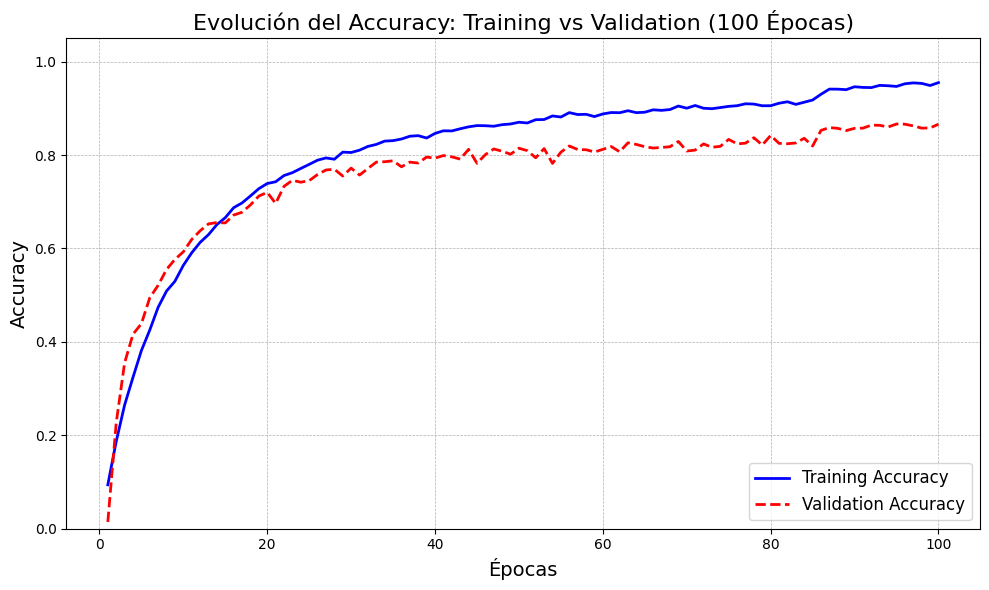

In [30]:
train_acc =history_v3.history["accuracy"]

# Lista de Accuracy de Validación (100 datos)
val_acc = history_v3.history["val_accuracy"]

# Generamos la lista de épocas (del 1 al 100)
epochs = range(1, 101)

# ---------------------------------------------------------
# 2. GENERACIÓN DEL GRÁFICO
# ---------------------------------------------------------

plt.figure(figsize=(10, 6)) # Tamaño del gráfico

# Dibujar las líneas
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy', linewidth=2)
plt.plot(epochs, val_acc, 'r--', label='Validation Accuracy', linewidth=2)

# Títulos y Etiquetas
plt.title('Evolución del Accuracy: Training vs Validation (100 Épocas)', fontsize=16)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Añadir leyenda y rejilla
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ajustar límites (Opcional: asumiendo accuracy de 0 a 1)
plt.ylim(0, 1.05)

# Mostrar gráfico
plt.tight_layout()
plt.show()

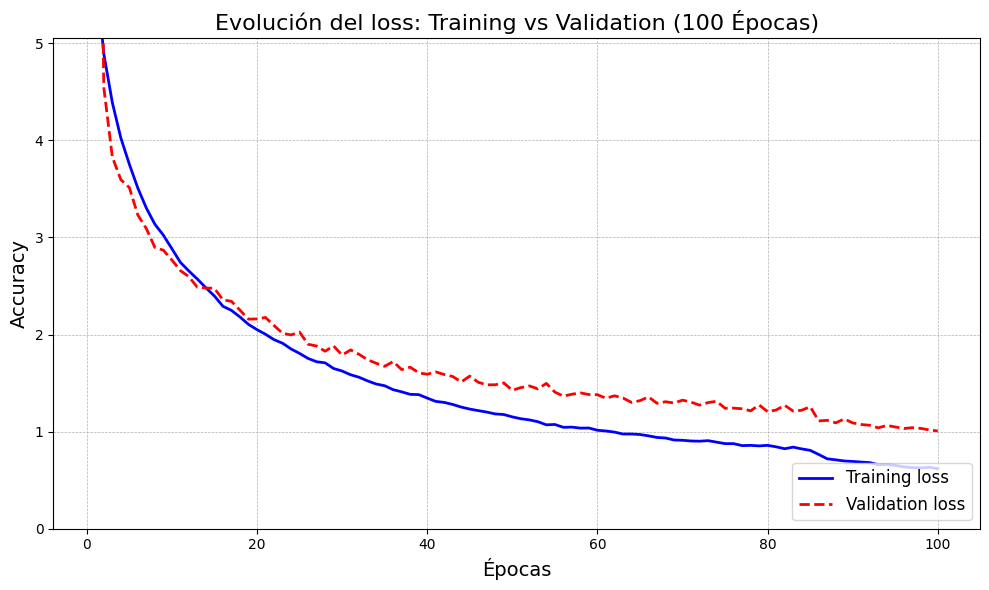

In [32]:
train_acc =history_v3.history["loss"]
val_acc = history_v3.history["val_loss"]

# Generamos la lista de épocas (del 1 al 100)
epochs = range(1, 101)

# ---------------------------------------------------------
# 2. GENERACIÓN DEL GRÁFICO
# ---------------------------------------------------------

plt.figure(figsize=(10, 6)) # Tamaño del gráfico

# Dibujar las líneas
plt.plot(epochs, train_acc, 'b-', label='Training loss', linewidth=2)
plt.plot(epochs, val_acc, 'r--', label='Validation loss', linewidth=2)

# Títulos y Etiquetas
plt.title('Evolución del loss: Training vs Validation (100 Épocas)', fontsize=16)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Añadir leyenda y rejilla
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ajustar límites (Opcional: asumiendo accuracy de 0 a 1)
plt.ylim(0, 5.05)

# Mostrar gráfico
plt.tight_layout()
plt.show()

<b><span style="font-size: 18px; color: magenta;">3.3.- EVALUACIÓN DEL MODELO PREDICTIVO Y PLANTEAMIENTO DE LA SIGUIENTE PRUEBA EXPERIMENTAL</span></b>

El modelo v3 representa una optimización exhaustiva de la capacidad, profundidad y entrenamiento en comparación con los modelos v1 y v2. Está diseñado para ser la red más potente y mejor regulada de las tres.
El modelo v3 eleva significativamente la complejidad de la arquitectura (comparado con v1) y refina los hiperparámetros de entrenamiento (comparado con v2).

<table border="1" style="width:100%; border-collapse: collapse; text-align: left;">
    <thead>
        <tr style="background-color: #f2f2f2;">
            <th style="padding: 10px;">Característica</th>
            <th style="padding: 10px;">Modelo v1</th>
            <th style="padding: 10px;">Modelo v2</th>
            <th style="padding: 10px;">Modelo v3 (Mejora)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="padding: 10px;"><strong>Profundidad CNN</strong></td>
            <td style="padding: 10px;">3 Bloques</td>
            <td style="padding: 10px;">3 Bloques</td>
            <td style="padding: 10px;"><strong>4 Bloques Conv/Pool.</strong> (Añade Conv2D(512)).</td>
        </tr>
        <tr>
            <td style="padding: 10px;"><strong>Máxima Capacidad</strong></td>
            <td style="padding: 10px;">256 filtros</td>
            <td style="padding: 10px;">256 filtros</td>
            <td style="padding: 10px;"><strong>512 filtros</strong> en el último bloque.</td>
        </tr>
        <tr>
            <td style="padding: 10px;"><strong>Batch Normalization (BN)</strong></td>
            <td style="padding: 10px;">Solo después de Dense</td>
            <td style="padding: 10px;">Después de cada Conv2D</td>
            <td style="padding: 10px;">Después de cada Conv2D (Mantiene la mejora de v2).</td>
        </tr>
        <tr>
            <td style="padding: 10px;"><strong>Dropout</strong></td>
            <td style="padding: 10px;">Ninguno (solo BN)</td>
            <td style="padding: 10px;">0.4 (CNN) y 0.6 (Dense)</td>
            <td style="padding: 10px;"><strong>Solo 0.5</strong> después de Dense (Regulación más sutil).</td>
        </tr>
        <tr>
            <td style="padding: 10px;"><strong>Regularización L2</strong></td>
            <td style="padding: 10px;">Solo en Bloques 2 y 3</td>
            <td style="padding: 10px;">En Bloques 2 y 3</td>
            <td style="padding: 10px;"><strong>En todos los Bloques Conv y la Capa Densa.</strong></td>
        </tr>
        <tr>
            <td style="padding: 10px;"><strong>Optimizador</strong></td>
            <td style="padding: 10px;">Adam ($LR=0.0005$)</td>
            <td style="padding: 10px;">Adam ($LR=0.0005$)</td>
            <td style="padding: 10px;"><strong>RMSprop ($LR=0.0001$).</strong></td>
        </tr>
        <tr>
            <td style="padding: 10px;"><strong>Paciencia (EarlyStop)</strong></td>
            <td style="padding: 10px;">$P=15$ (Alta)</td>
            <td style="padding: 10px;">$P=15$ (Alta)</td>
            <td style="padding: 10px;"><strong>$P=10$ y $\text{min\_delta}=0.001$</strong> (Detención más estricta).</td>
        </tr>
    </tbody>
</table>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Aumentar filtros, reducir regularización y hacer la red más profunda

print("Definiendo la arquitectura CNN v3 (Desde Cero, Mejorada)...")

model_v3 = Sequential([
    # Bloque 1: Mayor número de filtros
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.0001), input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Bloque 2
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Bloque 3: Mayor profundidad
    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Bloque 4: Máxima capacidad de extracción de características
    Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling2D((2, 2)), # Esto reduce el tensor a un tamaño manejable

    # Aplanamiento y Capas Densely Connected
    Flatten(),
    # Capa Densa más grande
    Dense(1024, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.7), 

    # Capa de Salida
    Dense(NUM_CLASSES, activation='softmax')
])

# Compilación
model_v3.compile(
    # RMSprop a menudo funciona mejor con redes más profundas que Adam
    optimizer=RMSprop(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_v3.summary()

# --- 2. Entrenamiento con Callbacks Avanzados ---

# Recalcular pasos por época (asegurando que no se corte el entrenamiento)
STEPS_PER_EPOCH = int(np.ceil(train_generator.samples / BATCH_SIZE))
VALIDATION_STEPS = int(np.ceil(validation_generator.samples / BATCH_SIZE))
EPOCHS = 100 # Aumentamos las épocas, EarlyStopping actuará como límite

# Definición de Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

checkpoint_path = 'best_cnn_from_scratch_v2.keras'
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Estrategia de Decaimiento de Tasa de Aprendizaje
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,         # Reduce la LR a 1/5
    patience=5,         # Espera 5 épocas sin mejora
    min_lr=0.00001,
    verbose=1
)

print(f"\nIniciando Entrenamiento para {EPOCHS} épocas...")
print(f"Pasos por Época (Train): {STEPS_PER_EPOCH}, Pasos (Validation): {VALIDATION_STEPS}")
